In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = open("./Fuel_Consumption_2000-2022.csv")
l_file = file.readlines()
file.close()
l_file = l_file[1:]

l_split_file = [a[:-1].split(",") for a in l_file]

### Fare il grafico di fuel consumpion ed emissions

In [3]:
l_consumption = [float(a[8]) for a in l_split_file]
l_emissions = [int(a[12]) for a in l_split_file]

consumption = np.array(l_consumption)
emissions = np.array(l_emissions)

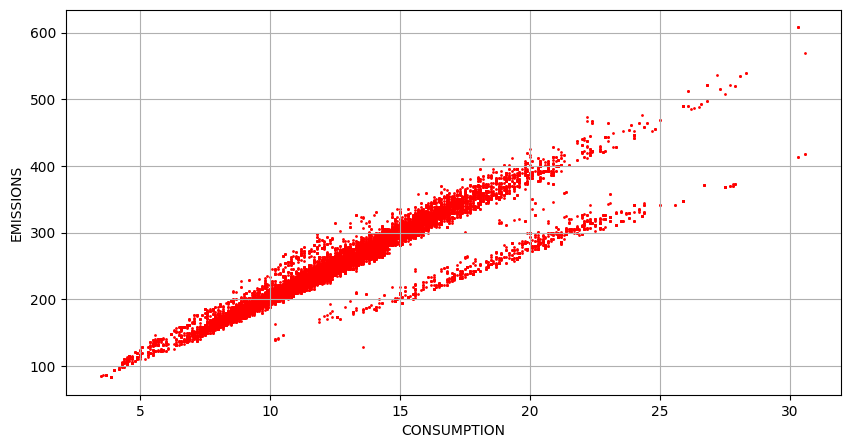

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(consumption, emissions, s = 1, c="r")
ax.set_xlabel("CONSUMPTION")
ax.set_ylabel("EMISSIONS")
ax.grid()
plt.show()

### Trovare le 5 marche più presenti nel file e fare il grafico a dispersione

In [5]:
# creo un array con le marche
marche = np.array([a[1] for a in l_split_file])

# creo un dizionario con il chiave la marca e come valore quante marche di un tipo sono presenti nel file
diz = {}
for a in marche:
    if a not in diz:
        diz[a] = np.count_nonzero(marche == a)

# faccio il sort dei valori ottenuti e prendo gli ultimi 5 perché ordinati in maniera crescente
sorted_dict = sorted(diz.values())[-5:]

# ottengo i nomi delle 5 migliori marche
l_migliori = [a for a,b in diz.items() if b in sorted_dict]

# prendo i valori consumption e emissions delle 5 marche più presenti e le inserisco in un dizionario
diz_consumption_emission = {}
for a in l_split_file:
    if a[1] in l_migliori:
        if a[1] not in diz_consumption_emission:
            diz_consumption_emission[a[1]] = [[],[]] # [[consumption],[emissions]]
            diz_consumption_emission[a[1]][0].append(float(a[8]))
            diz_consumption_emission[a[1]][1].append(int(a[12]))
        else:
            diz_consumption_emission[a[1]][0].append(float(a[8]))
            diz_consumption_emission[a[1]][1].append(int(a[12]))

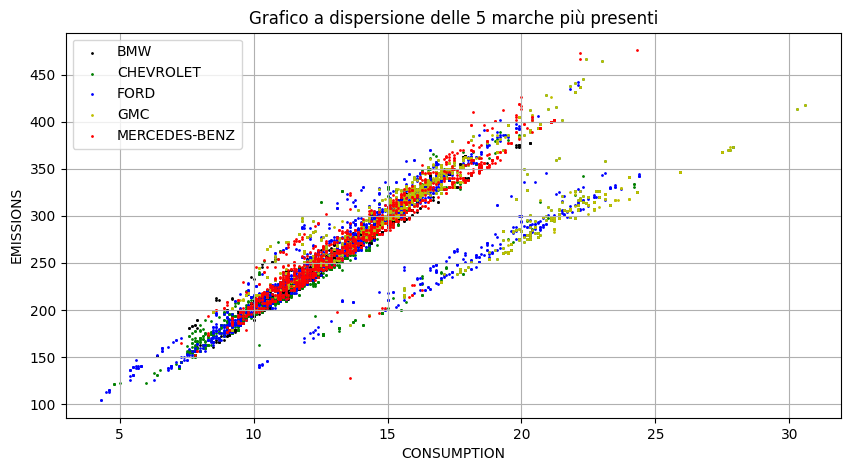

In [6]:
fig, ax = plt.subplots(figsize = (10,5))

colors = ["k","g","b","y","r","c","m"]
#c = np.random.uniform(0,1,3) #RGB
for i,(a,b) in enumerate(diz_consumption_emission.items()):
    ax.scatter(b[0], b[1], s = 1, c=colors[i], label = a)
            
ax.set_title("Grafico a dispersione delle 5 marche più presenti", fontsize = 12)

ax.set_xlabel("CONSUMPTION")
ax.set_ylabel("EMISSIONS")

ax.legend()

ax.grid()
plt.show()